
# Monte Carlo Activity

In this lecture we will introduce the idea of Monte Carlo (MC) sampling, a common tool in astrophysics to estimate parameters and evaluate complicated expressions. In general there are three types of problems MC sampling is useful for:

1) Generating Draws from a Probability Distribution: A common ocurance in astrophysics is that there is an underlying probability distribution (say distribution of the mass of galaxies) that we want to draw from for a simulation. In general, random number generators draw a number from between 0 and 1, so how do we get a distribution from that which matches the distribution we want (hint, MC sampling!)

2) Optimization: This is a more powerful example, if there is a complex parameter space (say, the energy content of the universe in dark matter, radiation, and bayronic matter) the most common way to explore it to find the "most likely" answer is using Monte Carlo sampling. Unlike steepest gradient descent (see last activity), this should find the true global optimal spot in addition to any locally optimal points.

3) Numerical Integration: Complex multidimensional integrals are difficult to evaluate numerically and using MC sampling is an excellent way to explore this.

## Example of Numerical Integration: Calculating an estimate of Pi

$\pi$ (pi) is an irrational number and so cannot be expressed as a simple fraction. To calculate it's value to arbitrary precision we will use an MC sampling technique! To do so we will do essentially do a numerical integral of a quarter circle with radius 1 to find its area. We know from basic geometry that this area should be 

$\frac{\pi r^2}{4} \rightarrow \frac{\pi}{4}$

So if we find the area numerically and multiply by 4 we know $\pi$!

The basic algorithm is as follows:

1) We define a function for the curve of the quarter circle.

2) We draw two points from 0 to 1, one for an x coordinate, one for a y coordinate.

3) If the point is below the curve, it is in the circle, if it is above the curve it is outside of the circle.

4) We continue to draw samples (more samples means more accurate estimate of $\pi$).

5) The ratio of the number of samples in the circle to the total number of samples is the ratio between the area in the circle and the total area we are drawing from (in this case it is a square with side length 1, so total area of 1). 

Populating the interactive namespace from numpy and matplotlib


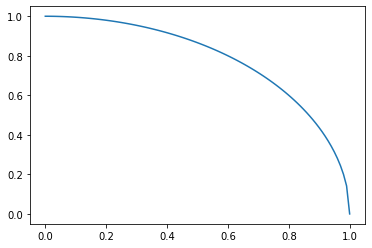

In [3]:
%pylab inline

#step 1: define function

#x^2+y^2 =1 -> y = sqrt(1-x^2) (we only care about the positive side for the quarter circle)

def circle(x):
    return np.sqrt(1.-x**2)

#plotting to show

x_array = np.linspace(0,1,100)

plt.plot(x_array,circle(x_array))

0.6816617299028962 0.6004702588457086
We are inside the circle!


Text(0, 0.5, '$y$')

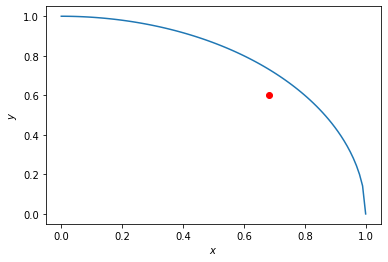

In [5]:
#Step 2: draw random numbers from 0 to 1
x_point = np.random.random()
y_point = np.random.random()

print(x_point, y_point)
#Step 3: see if point is in or outside of circle
if circle(x_point)>y_point:
    print("We are inside the circle!")
    plt.plot(x_point,y_point,"ro")
else:
    print("We are outside the circle!")
    plt.plot(x_point,y_point,"bo")

plt.plot(x_array,circle(x_array))
plt.xlabel("$x$")
plt.ylabel("$y$")

Our estimate of Pi is 3.268


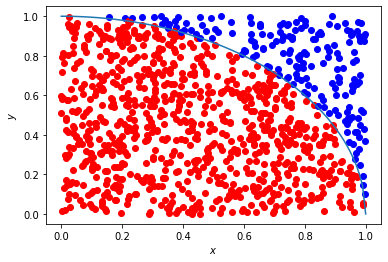

In [6]:
#step 4: Draw many samples

n = 1000 #number of samples

n_inside = 0.0 #number of points inside
for i in range(0,n):
    #draw random point
    x_point = np.random.random()
    y_point = np.random.random()
    #check if point is in circle
    if circle(x_point)>y_point:
        n_inside +=1.0 #if point is in circle, add one to counter
        plt.plot(x_point,y_point,"ro")
    else:
        plt.plot(x_point,y_point,"bo")

plt.plot(x_array,circle(x_array))
plt.xlabel("$x$")
plt.ylabel("$y$")
# Step 5: Take the ratio to find pi (note again we are using the quarter circle)
print("Our estimate of Pi is "+str(4.0*n_inside/n))

In [7]:
#Note: it works better/faster without the plotting ;)
n = 1000000

n_inside = 0.0 #number of points inside
for i in range(0,n):
    x_point = np.random.random()
    y_point = np.random.random()

    if circle(x_point)>y_point:
        n_inside +=1.0

print("Our estimate of Pi is "+str(4.0*n_inside/n))


Our estimate of Pi is 3.140376


In [8]:
#We can also make our program faster by using numpy array functions, usually numpy arrays are 
# faster than individually going through each element
n = 100000000
x_points = np.random.random(n)
y_points = np.random.random(n)
n_inside = np.sum(circle(x_points) > y_points)
print("Our estimate of Pi is "+str(4.0*n_inside/n))

Our estimate of Pi is 3.14192944


## Example: Drawing from a Probability Distribution Evaluation

Poisson Distributions describe the frequency of relatively rare discrete events. The original example was by a Ladislaus Bortkiewicz in 1898, a statistician who was charged with investigating the frequency of deaths in the Prussian army caused by horse kicks. There weren't quite enough horse kick deaths per month to lead to a more commonly studied Gaussian distribution (see Central Limit Theorem), but there were still enough to draw some statistical trends; the Poisson distribtion! Analytically it looks like

$\Pr(k)= \frac{\lambda^k e^{-\lambda}}{k!} = \frac{\lambda^k e^{-\lambda}}{\Gamma(k+1)} ,$

where $\lambda$ is a parameter which changes the shape of the distribution by shifting the peak. The gamma function, $\Gamma$, is a generalization of factorials which are valid for any number, not just integers.

In [9]:
from scipy import special #so we have the gamma function already defined! Don't want to have to define it ourself...

def Pr(k,l):
    return l**k*np.exp(-l)/special.gamma(k+1) 

Text(0, 0.5, '$Pr(k)$')

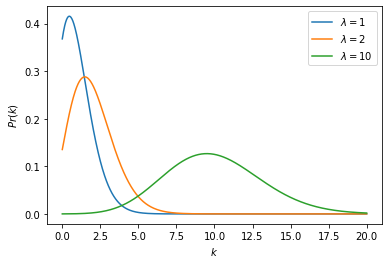

In [10]:
k_array = np.linspace(0,20,1000) 
pr_array_1 =np.array([Pr(K,1) for K in k_array]) #lambda = 1
pr_array_2 =np.array([Pr(K,2) for K in k_array]) #lambda = 2
pr_array_10 =np.array([Pr(K,10) for K in k_array]) #lambda = 10



plt.plot(k_array,pr_array_1,label="$\lambda=1$")
plt.plot(k_array,pr_array_2,label="$\lambda=2$")
plt.plot(k_array,pr_array_10,label="$\lambda=10$")
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$Pr(k)$")

The procedure to draw from the probability distribution is straightforward. First we define the distribution and the range we want to draw from (we will use $\lambda = 2$ and $0<x<10$). Then we draw a random $x,y$ coordinate in a box with length of the range, and width $0<y<1$ (if you want to speed up the algorithm, you can use a $y_{max}=\max_{x_{min}<x<x_{max}}{Pr}$ in the range of interest). Just like in the previous example, test to see if the point is below or above the curve; if it is below the curve it is accepted as a draw, if it is above it is discarded and a new point is drawn.

Text(0, 0.5, '$Pr(k)$')

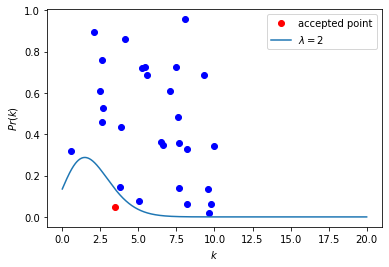

In [11]:
x_point = np.random.random()*10. #we are drawing a random number between 0 and 10, not 0 and 1
y_point = np.random.random()*1.

accepted_value = False

while not accepted_value:
    x_point = np.random.random()*10. #we are drawing a random number between 0 and 10, not 0 and 1
    y_point = np.random.random()*1.
    if Pr(x_point,2)>y_point:
        accepted_value = x_point
        plt.plot(x_point,y_point,"ro",label="accepted point")

    else:
        plt.plot(x_point,y_point,"bo")

plt.plot(k_array,pr_array_2,label="$\lambda=2$")
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$Pr(k)$")

We can make things more efficient by setting a more realistic $y_{max}=0.4$; remember that this value will depend on the distribution you are using.

Text(0, 0.5, '$Pr(k)$')

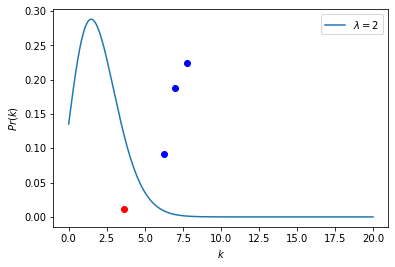

In [12]:
accepted_value = False

while not accepted_value:
    x_point = np.random.random()*10. #we are drawing a random number between 0 and 10, not 0 and 1
    y_point = np.random.random()*0.35
    if Pr(x_point,2)>y_point:
        accepted_value = x_point
        plt.plot(x_point,y_point,"ro")

    else:
        plt.plot(x_point,y_point,"bo")

plt.plot(k_array,pr_array_2,label="$\lambda=2$")
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$Pr(k)$")

In [13]:
#nice draw function from an arbitrary poisson distribution

def draw(l,y_min=0.0,y_max=1.0,x_min=0.0,x_max=10.):

    accepted_value = False

    while not accepted_value:
        x_point = np.random.random()*(x_max-x_min)+x_min #adjusting range appropriately
        y_point = np.random.random()*(y_max-y_min)+y_min #adjusting range appropriately
        if Pr(x_point,l)>y_point:
            accepted_value = x_point
    return accepted_value

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


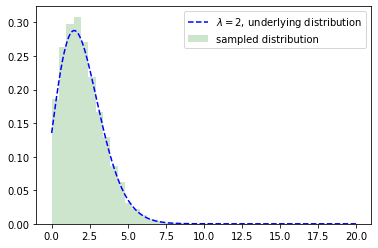

In [14]:
#making a big list of draws

draws = [draw(2) for i in range(0,10000)]

#plot histogram
n, bins, patches = plt.hist(draws, 20, normed=1, facecolor='green', alpha=0.20,label="sampled distribution")
plt.plot(k_array,pr_array_2,"b--",label="$\lambda=2$, underlying distribution")
plt.legend()


# Example Optimization: Parameter estimation of harmonic oscillator

There is a simulated classic harmonic oscillator data in the data folder. We will try to extract three parameters from this data: the orginal displacement from equilbrium $x_0$, the spring constant $k$, and the damping force $b$. There is "realistic" uncertainity (i.e. white noise) added to the measurements. We will use a very naive Monte Carlo technique to estimate these three parameters. To do this we need the following:

1) A model for our spring system.

We will assume an underdamped harmonic oscillator. 

2) A prior range for our parameters.

We will assume the following range for our parameters, with flat priors...

$0<x_0<1$

$0<k<10$

$0<b<20$

$m=100$

$v_0=0$

3) A chisquared (or likelihood) calculation.

We will assume our error on each measurement is constant.

In [15]:
def true_motion(t,x_0,v_0,k,b,m):
    w0 = sqrt(k/m)
    b0 = b/m
    
    if b0**2.-4.*w0**2.>0:
        raise NameError("Not underdamped system! "+ str(b0**2.-4.*w0**2.) )
        
    gamma = 1/2. *sqrt(4*w0**2. - b0**2.)
    
    A = x_0
    B = v_0 + 1/2.*gamma*x_0
    return (A*cos(t*gamma)+B*sin(t*gamma))*exp(-b0*t/m)

In [16]:
def chi_squared(data,parameter_guess):
    x_0,v_0,k,b,m = parameter_guess
    t_array = data[:,0]
    x_experiment = data[:,1]
    x_guess = np.array([true_motion(t,x_0,v_0,k,b,m) for t in t_array])
    
    chi_squared = np.power((x_guess - x_experiment),2)/0.05
    
    return np.sum(chi_squared)
    

In [17]:
#true values
k = 8.25 #spring constant
sigma_x = 0.04 #uncertainty in the x measurement
x_0 = 0.5 #staring position
v_0 = 0.0 #starting velocity
b = 4. #damping
m = 10. #mass

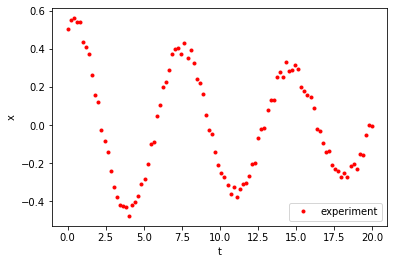

In [19]:
d_out = np.genfromtxt("./data/hooks_law.txt")
t_range=d_out[:,0]
x_range=d_out[:,1]
plt.plot(d_out[:,0],d_out[:,1],"r.",label="experiment")
plt.xlabel("t")
plt.ylabel("x")
#plt.plot(t_range,[true_motion(t,x_0,v_0,k,b,m) for t in t_range],label = "theory curve")
plt.legend(loc=4)

Our algorithm will be very naive (i.e. inefficent) to start out with...

1) Choose a random value for the 3 parameters.

2) Calculate and save chi_squared.

3) Choose a new random value for the 3 parameters.

4) Calcualte chi_squared and compare with old value of chi_squared. If it is better replace old value with new value, if not discard new value.

5) Iterate steps 3 and 4 as many times as possible.

[0.4775614085484201, 0.0, 8.241353885800008, 3.9351342328146655, 10.0] 1.408049697516489
true value
0.5 0.0 8.25 4.0 10.0


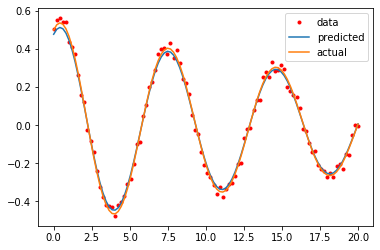

In [21]:
#array_1sig = []
chi_old = 1000.0 
for i in range(0,1000):
    # generate random point
    x_g = np.random.rand()*1.0
    v_0 = 0.0
    k_g = np.random.rand()*10.0
    b_g = np.random.rand()*5.0
    m_g = 10.0
    try: #calculating the chi-squared of points
        chi_new = chi_squared(d_out,[x_g,v_0,k_g,b_g,m_g])
  #      if chi_new<4.72:
 #           array_1sig.append([x_g,v_0,k_g,b_g,m_g])
  #          plt.plot(t_range,[true_motion(t,best_guess[0],best_guess[1],best_guess[2],best_guess[3],best_guess[4]) for t in t_range],"r--")
    except: #Our theory is only valid for under-damped systems... skips parameters that fall outside this range
        next 
    if chi_new <chi_old: #accept point if it has lower chi-squared than previous point
        chi_old = chi_new
        best_guess = [x_g,v_0,k_g,b_g,m_g]
print(best_guess, chi_old)
print("true value")
print(x_0,v_0,k,b,m)

#plot final
plt.plot(t_range,x_range,"r.",label="data")
plt.plot(t_range,[true_motion(t,best_guess[0],best_guess[1],best_guess[2],best_guess[3],best_guess[4]) for t in t_range],label="predicted")
plt.plot(t_range,[true_motion(t,x_0,v_0,k,b,m) for t in t_range],label = "actual")
plt.legend(loc=1)



# Markov Chains Monte Carlo (i.e. the MCMC)

These results are fairly accurate! But we could do a bit better instead by creating a "markov chain" where when we get a better point we search closer to that point than to a random point. We will alter the algorithm slightly...

1) Choose a random value for the 4 parameters as a starting point.

2) Calculate and save chi_squared.

3) Choose a new value as follows: add a small random number to each value of the old best fit point. The better the chi-squared the smaller the additional value.

4) Calcualte chi_squared and compare with old value of chi_squared. If it is better replace old value with new value, if not discard new value.

5) Iterate steps 3 and 4 as many times as possible.

[0.4966792035714202, 0.0, 8.231270125275891, 3.7500757260174544, 10.0] 0.5718434461208821
true value
0.5 0.0 8.25 4.0 10.0


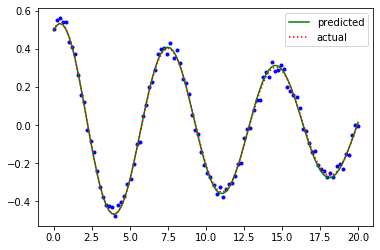

In [23]:
chi_old = 1000.0

#starting point

x_g = np.random.rand()*1.0
v_0 = 0.0
k_g = np.random.rand()*10.0
b_g = np.random.rand()*5.0
m_g = 10.0
best_guess = [x_g,v_0,k_g,b_g,m_g]
chi_old = chi_squared(d_out,[x_g,v_0,k_g,b_g,m_g])
points_array = []#saving the actual chain of points
for i in range(0,2000):
    d = sqrt(chi_old)/5. #There is an art/science to choosing this value which we will explore later...
    x_g,v_0,k_g,b_g,m_g = best_guess
    x_g_n = x_g +(np.random.rand()-0.5)*d
    k_g_n = k_g +(np.random.rand()-0.5)*d
    b_g_n = b_g +(np.random.rand()-0.5)*d
    try:
        chi_new = chi_squared(d_out,[x_g_n,v_0,k_g_n,b_g_n,m_g])/4
    except: 
        next
    if chi_new <chi_old:
        chi_old = chi_new
        best_guess = [x_g_n,v_0,k_g_n,b_g_n,m_g]
        points_array.append([x_g_n,v_0,k_g_n,b_g_n,m_g])

print(best_guess , chi_new)        
print("true value")
print(x_0,v_0,k,b,m)
plt.plot(t_range,x_range,"b.")
plt.plot(t_range,[true_motion(t,best_guess[0],best_guess[1],best_guess[2],best_guess[3],best_guess[4]) for t in t_range],"g-",label="predicted")
plt.plot(t_range,[true_motion(t,x_0,v_0,k,b,m) for t in t_range],"r:",label = "actual")
plt.legend(loc=1)


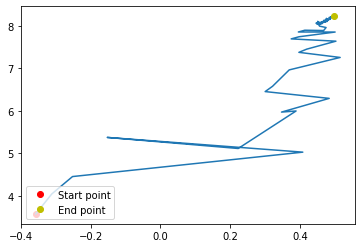

In [24]:
#Looking at the chain!
chain_points=np.array(points_array)
plt.plot(chain_points[0,0],chain_points[0,2],"ro",label="Start point")
plt.plot(chain_points[:,0],chain_points[:,2])
plt.plot(chain_points[-1,0],chain_points[-1,2],"yo",label="End point")
plt.legend(loc=3)